### Water Quality Prediction

In this notebook we are going to deep dive into looking in the dataset and understanding features and labels.

We are also going to learn data cleaning.

### Importing Packages

In teh next code cell we are going to import all the packages that we are going to use in this notebook.

In [ ]:
# !pip install -q helperfns kaggle

In [75]:
import numpy as np 
import pandas as pd

import os
import time
import random
import warnings

from helperfns.tables import tabulate_data
from sklearn.utils import resample
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

warnings.filterwarnings("ignore")

print("pandas:", pd.__version__)
print("numpy:", np.__version__)

pandas: 2.1.4
numpy: 1.26.4


### Seeding

Next we are going to set the `seed` to all the random operations that we are going to have in this notebook for reproducivity.

In [3]:
SEED = 7

np.random.seed(SEED)
random.seed(SEED)

### Dataset.

The dataset that we will be using in this notebook was downloaded from the following url:

https://www.kaggle.com/code/imakash3011/water-quality-prediction-7-model


In [7]:
data_path = 'water_potability.csv'
dataframe = pd.read_csv(data_path)
dataframe.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

From the above data we can see that we have column names:

1. ph	
2. Hardness	
3. Solids	
4. Chloramines	
5. Sulfate	
6. Conductivity	
6. Organic_carbon	
8. Trihalomethanes	
9. Turbidity	
10. Potability

We can think of these columnns as our features or input to a model. According to the dataset these features are examplained to be.

1. `ph`: pH of 1. water (0 to 14).
2. `Hardness`: Capacity of water to precipitate soap in mg/L.
3. `Solids`: Total dissolved solids in ppm.
4. `Chloramines`: Amount of Chloramines in ppm.
5. `Sulfate:` Amount of Sulfates dissolved in mg/L.
6. `Conductivity`: Electrical conductivity of water in μS/cm.
7. `Organic_carbon`: Amount of organic carbon in ppm.
8. `Trihalomethanes`: Amount of Trihalomethanes in μg/L.
9. `Turbidity`: Measure of light emiting property of water in NTU.
10. `Potability`: Indicates if water is safe for human consumption. `Potable -1` and `Not potable -0`

> We can see that among the `10` columns, we want to predict the column `Potability` if either the water is consumable by human being given other `9` column features. So now we can think of our features as:

1. ph	
2. Hardness	
3. Solids	
4. Chloramines	
5. Sulfate	
6. Conductivity	
6. Organic_carbon	
8. Trihalomethanes	
9. Turbidity

And the target value to be predicted as

1. Potability

Which has value either `1` or `0`. Let's check if this dataframe does have 2 labels.

In [9]:
dataframe.Potability.unique()

array([0, 1], dtype=int64)

Let's change few things in our data. We are going to change the following:

1. column names so that they will be lower case
2. `Potability` label from numerical to categorical.

In [15]:
columns = {i: i.lower() for i in dataframe.columns}
columns

{'ph': 'ph',
 'Hardness': 'hardness',
 'Solids': 'solids',
 'Chloramines': 'chloramines',
 'Sulfate': 'sulfate',
 'Conductivity': 'conductivity',
 'Organic_carbon': 'organic_carbon',
 'Trihalomethanes': 'trihalomethanes',
 'Turbidity': 'turbidity',
 'Potability': 'potability'}

In [17]:
dataframe.rename(columns = columns, inplace=True)
dataframe.head(2)

ph    hardness        solids  chloramines     sulfate  conductivity  \
0      NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.71608  129.422921  18630.057858     6.635246         NaN    592.885359   

   organic_carbon  trihalomethanes  turbidity  potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0

In [19]:
dataframe.potability = dataframe.potability.apply(lambda x: "not portable" if x == 0 else 'portable')
dataframe.head(3)

ph    hardness        solids  chloramines     sulfate  conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   

   organic_carbon  trihalomethanes  turbidity    potability  
0       10.379783        86.990970   2.963135  not portable  
1       15.180013        56.329076   4.500656  not portable  
2       16.868637        66.420093   3.055934  not portable

Now that our label's are categorical, we want to analyise the data that we are having. But first of all we can see that some other columns have `NaN` values, we want to check the columns that have `NaN` values and clean the data afterwards.

In [21]:
dataframe.isna().any()

ph                  True
hardness           False
solids             False
chloramines        False
sulfate             True
conductivity       False
organic_carbon     False
trihalomethanes     True
turbidity          False
potability         False
dtype: bool

In the columns `ph`, `sulfate` and `trihalomethanes` we have `na` values.

In [27]:
new_dataframe = dataframe.copy()
new_dataframe.dropna(inplace=True)
new_dataframe = new_dataframe.reset_index(drop=True)
new_dataframe.head(2)

ph    hardness        solids  chloramines     sulfate  conductivity  \
0  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
1  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   organic_carbon  trihalomethanes  turbidity    potability  
0       18.436524       100.341674   4.628771  not portable  
1       11.558279        31.997993   4.075075  not portable

In [29]:
new_dataframe.isna().any()

ph                 False
hardness           False
solids             False
chloramines        False
sulfate            False
conductivity       False
organic_carbon     False
trihalomethanes    False
turbidity          False
potability         False
dtype: bool

In [31]:
new_dataframe.isnull().any()

ph                 False
hardness           False
solids             False
chloramines        False
sulfate            False
conductivity       False
organic_carbon     False
trihalomethanes    False
turbidity          False
potability         False
dtype: bool

In [41]:
columns = ["Set", "Total", 'Percentage (%)']
_data = [
    ["ALL DATA", f"{len(dataframe):,}", f"{len(dataframe)/len(dataframe) * 100:.2f}"],
    ["CLEANED DATA", f"{len(new_dataframe):,}", f"{len(new_dataframe)/len(dataframe) * 100:.2f}"],
    ["LOST DATA", f"{len(dataframe) - len(new_dataframe):,}", f"{(len(dataframe) - len(new_dataframe))/len(dataframe) * 100:.2f}" ],
]
tabulate_data(columns, _data, title="DATASET SIZE AFTER CLEANING")

DATASET SIZE AFTER CLEANING
+--------------+-------+----------------+
| Set          | Total | Percentage (%) |
+--------------+-------+----------------+
| ALL DATA     | 3,276 |         100.00 |
| CLEANED DATA | 2,011 |          61.39 |
| LOST DATA    | 1,265 |          38.61 |
+--------------+-------+----------------+


We can see that we only have `2 011` examples of clean data that we can work with do to this predictive task.


Let's try to understand the distribution of features and labels. We are going to start by the distribution of labels.

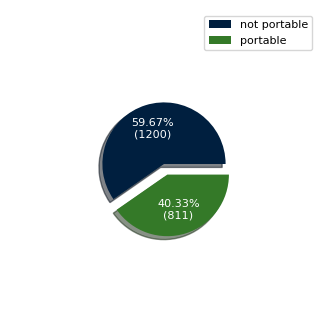

In [51]:
dist_label = {i:0 for i in new_dataframe.potability.unique()}
for val in new_dataframe.potability:
  dist_label[val] += 1

def fmt(x, total):
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)

colors = ['#001F3F', '#347928']

plt.figure(figsize=(4, 4))
plt.pie(
    dist_label.values(), labels=dist_label.keys(), autopct=lambda x: fmt(x, len(new_dataframe)),
    textprops={'color': 'white', 'fontsize':8}, radius=.5, explode=[.0, .09],
    colors=colors, shadow=True,
)
plt.legend(fontsize=8)
plt.show()

We can see that we have inbalance of classes here. We have `811` features that belongs to the `portable` label and `1200` that belongs to the other class. As a good practice it's aways good to work with the dataset that has balanced labels especially for classification tasks.

> Note that when the dataset labels are not balanced, model accuracy won't a good measure of how the model performs.

In the next code cell we are going to balance our dataset based on the class that has least examples.

In [59]:
new_dataframe['potability'].value_counts().idxmin()

'portable'

In [61]:
# Separate the majority and minority classes
majority_class = new_dataframe[new_dataframe['potability'] == new_dataframe['potability'].value_counts().idxmax()]
minority_class = new_dataframe[new_dataframe['potability'] == new_dataframe['potability'].value_counts().idxmin()]

# Downsample majority class to the size of the minority class
majority_downsampled = resample(
    majority_class,
    replace=False,  # without replacement
    n_samples=len(minority_class),  # match minority class size
    random_state=SEED  # for reproducibility
)


# Combine downsampled majority and original minority
balanced_df = pd.concat([majority_downsampled, minority_class]).reset_index(drop=True)

balanced_df.head(3)

ph    hardness        solids  chloramines     sulfate  conductivity  \
0  7.775386  193.077168  15704.482093     7.881197  324.336203    301.753477   
1  8.184410  166.636554  17944.852375     4.038955  331.954199    363.235756   
2  7.333003  189.447965  32358.538595     6.346378  341.346443    490.625291   

   organic_carbon  trihalomethanes  turbidity    potability  
0       13.378165        89.051957   3.309472  not portable  
1       12.535838        56.310592   4.599082  not portable  
2       12.537466        61.581378   2.642004  not portable

Now we can check if the dataset is balanced or not.

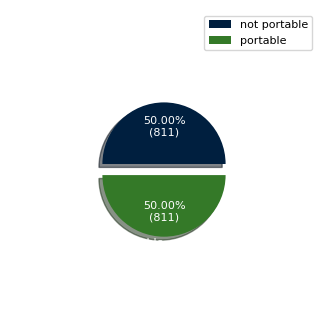

In [64]:
dist_label = {i:0 for i in balanced_df.potability.unique()}
for val in balanced_df.potability:
  dist_label[val] += 1

plt.figure(figsize=(4, 4))
plt.pie(
    dist_label.values(), labels=dist_label.keys(), autopct=lambda x: fmt(x, len(balanced_df)),
    textprops={'color': 'white', 'fontsize':8}, radius=.5, explode=[.0, .09],
    colors=colors, shadow=True,
)
plt.legend(fontsize=8)
plt.show()

### Feature Analysis.

Next we are going to analyse and try to understand the features. In this section we will be using plot's to understand the dataset that we have. We are going to create a function that will plot how the each feature relates, relative to the selected target.

<Figure size 640x480 with 0 Axes>

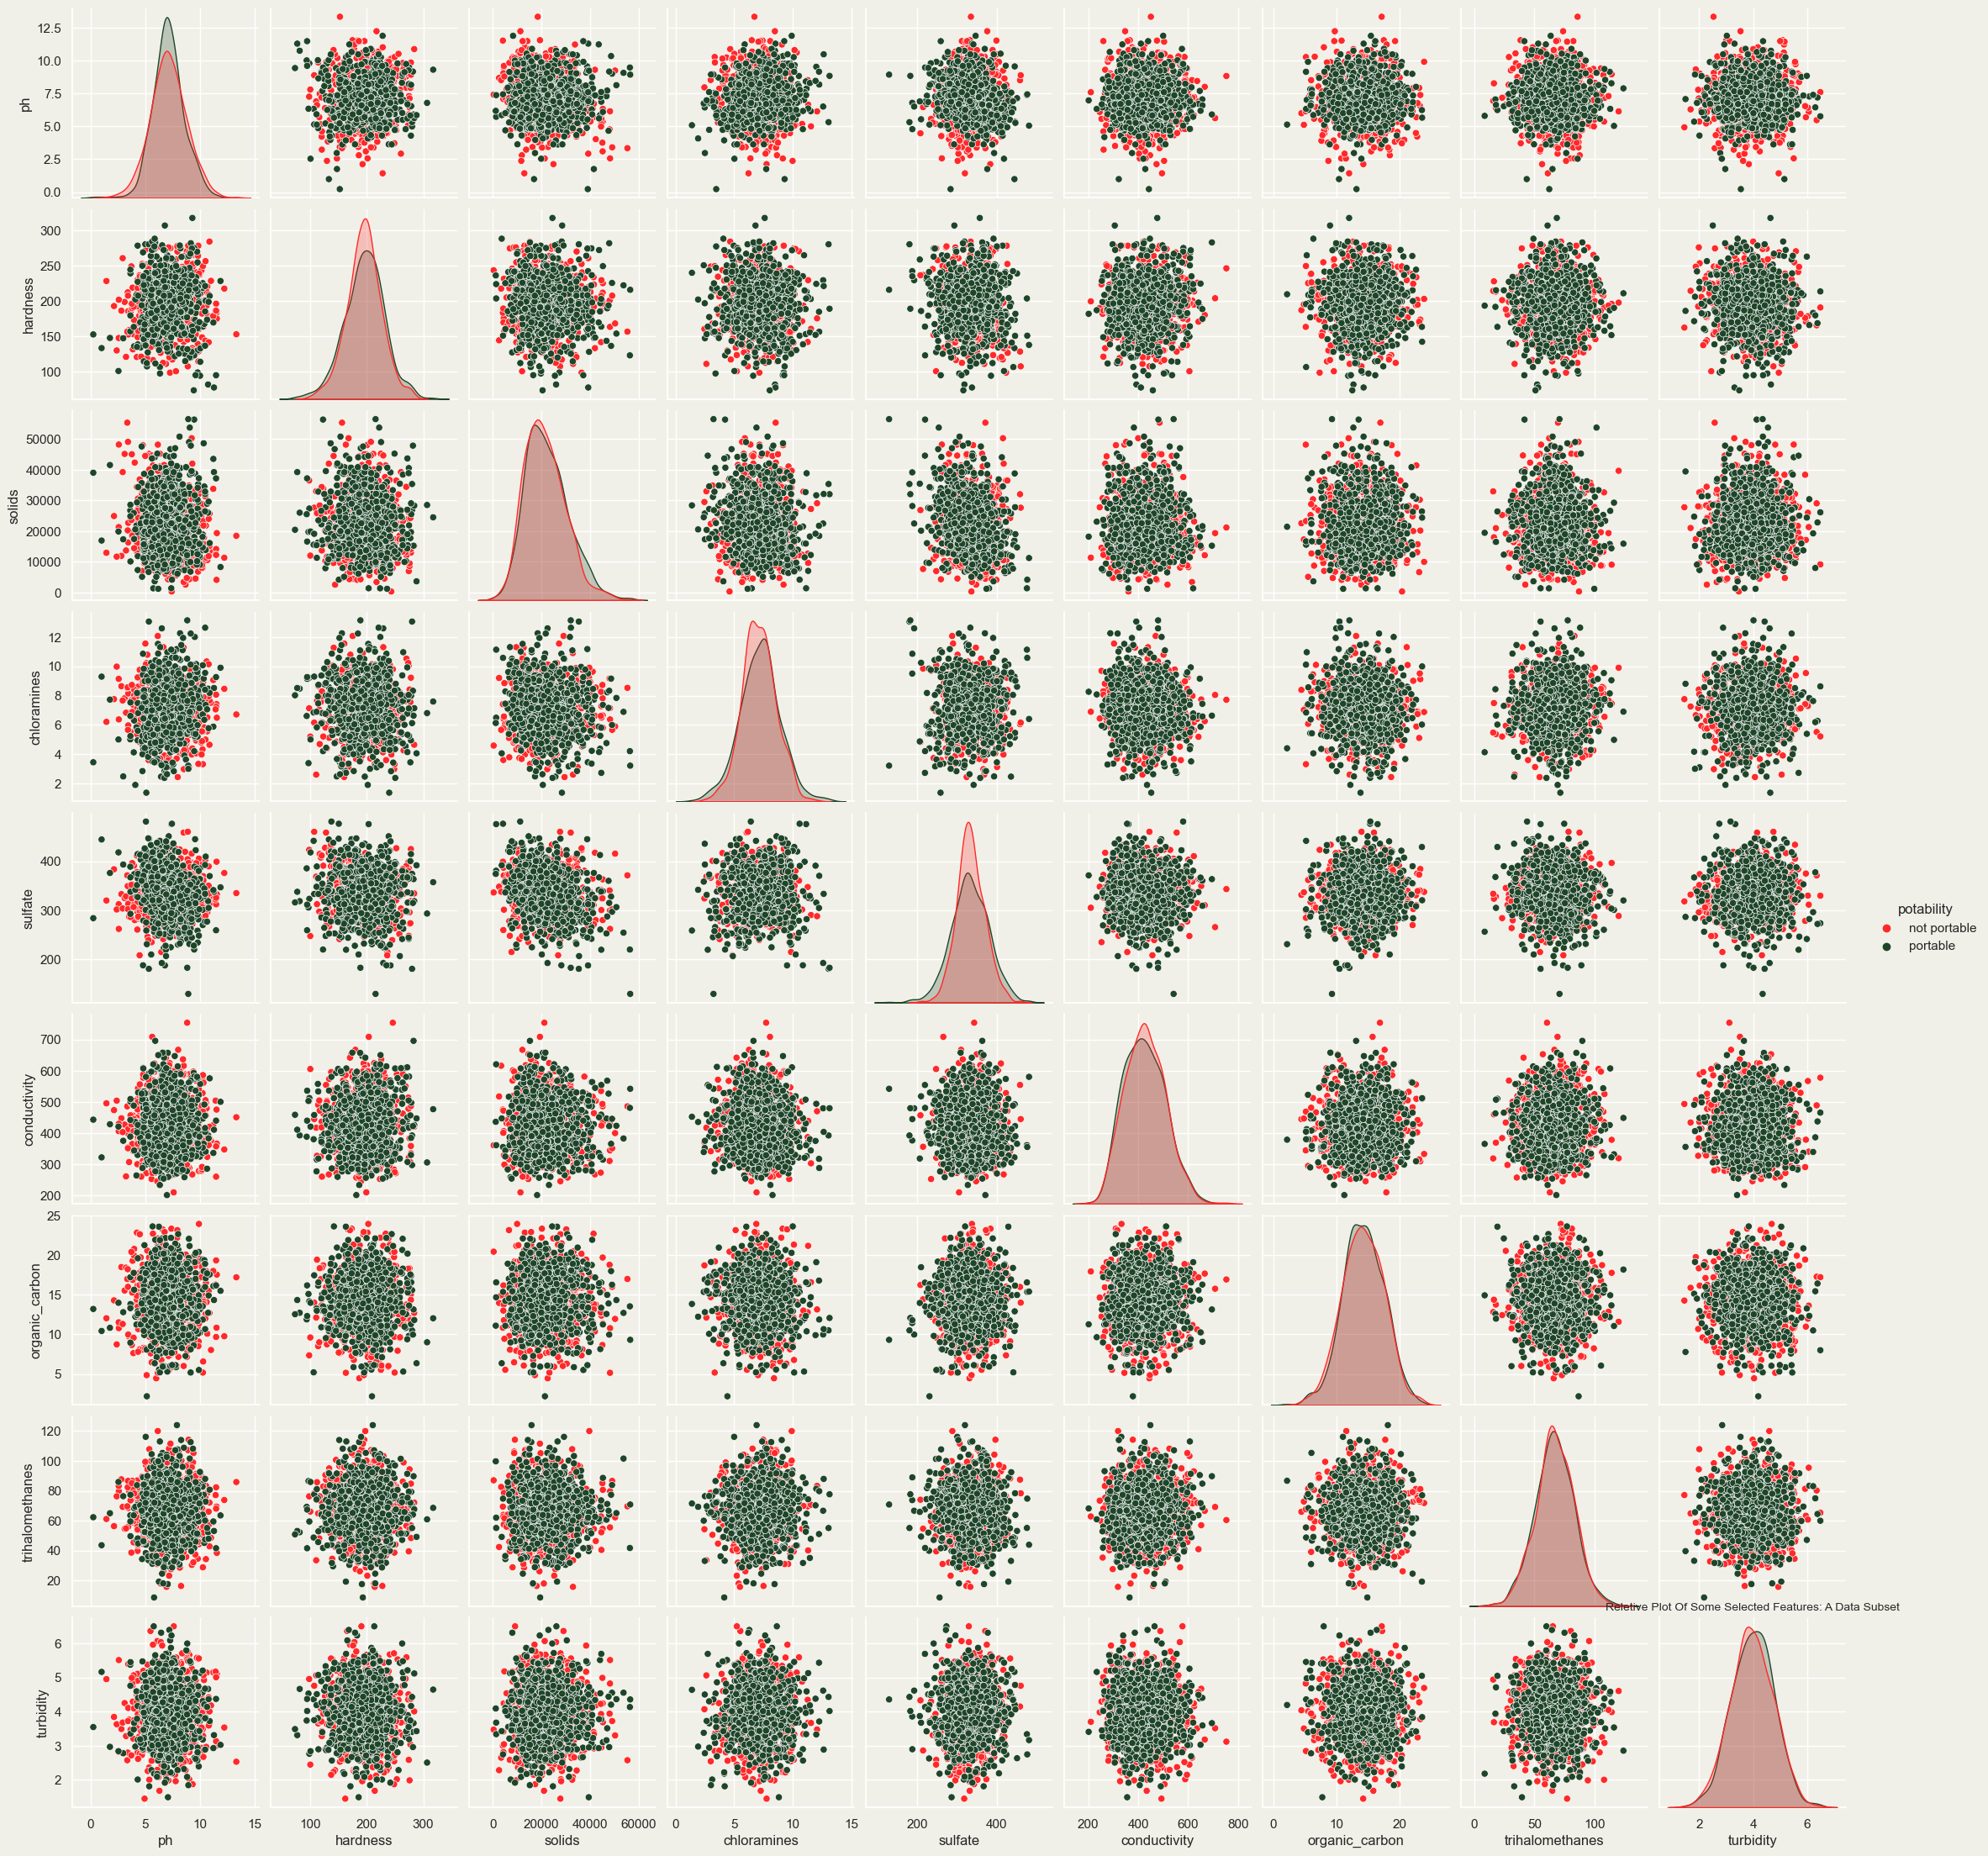

In [70]:
def plot_relationship(dataframe, target, features):
    sns.set(rc={"axes.facecolor":"#F1F0E8","figure.facecolor":"#F1F0E8"})
    plt.figure()
    sns.pairplot(dataframe[features], hue=target, palette= (["#FF2929","#1F4529"]))
    plt.minorticks_on()
    plt.grid(which='major', color='gray', linestyle='-', linewidth=0.4)
    plt.grid(which='minor', color='#7ED4AD', linestyle='--', linewidth=0.2)
    plt.title("Reletive Plot Of Some Selected Features: A Data Subset", fontsize=10)
    plt.show()
plot_relationship(balanced_df, 'potability', balanced_df.columns)


> We can see that our dataset doen't have many outlier. I think this dataset is good.


Next, let us look at the correlation amongst the features. (Excluding the categorical attributes at this point)

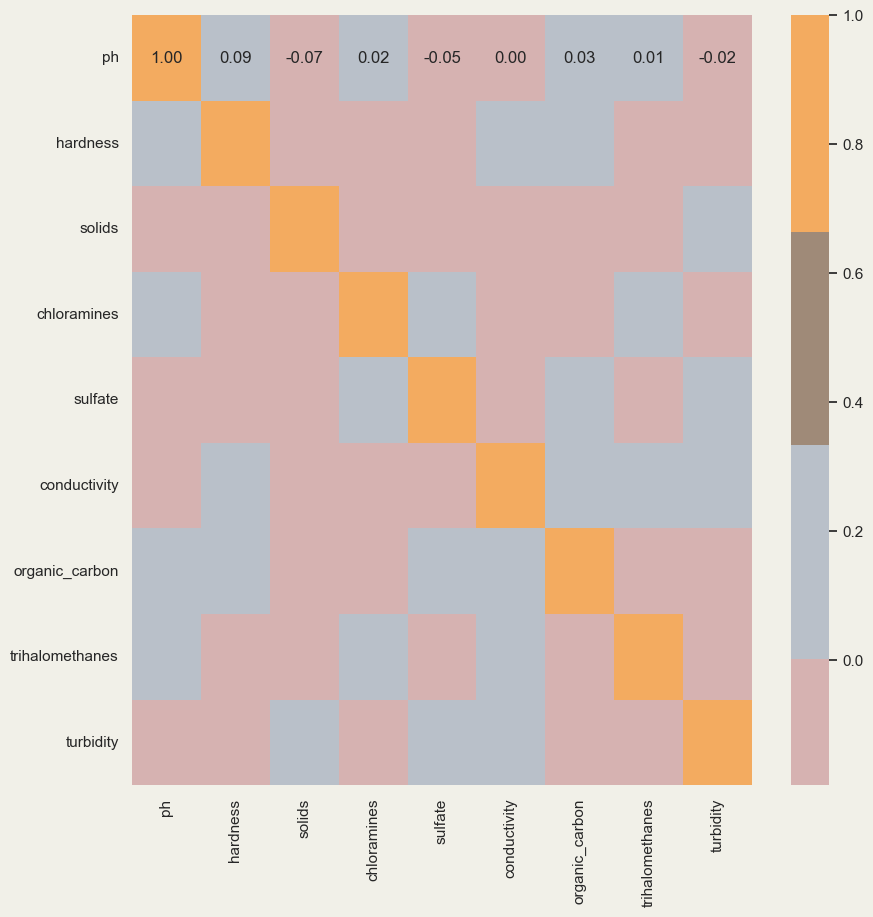

In [79]:
cmap = ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
corrmat= balanced_df.corr(numeric_only=True)
plt.figure(figsize=(10,10))  
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0, fmt=".2f")
plt.show()

In [81]:
corrmat

ph  hardness    solids  chloramines   sulfate  \
ph               1.000000  0.088661 -0.070698     0.016378 -0.047773   
hardness         0.088661  1.000000 -0.057122    -0.033506 -0.099980   
solids          -0.070698 -0.057122  1.000000    -0.051678 -0.193183   
chloramines      0.016378 -0.033506 -0.051678     1.000000  0.018288   
sulfate         -0.047773 -0.099980 -0.193183     0.018288  1.000000   
conductivity     0.002495  0.026164 -0.008029    -0.037865 -0.023671   
organic_carbon   0.026176  0.020215 -0.001698    -0.033735  0.030051   
trihalomethanes  0.008430 -0.010993 -0.018926     0.033642 -0.039258   
turbidity       -0.016803 -0.041444  0.024736     0.001471  0.010235   

                 conductivity  organic_carbon  trihalomethanes  turbidity  
ph                   0.002495        0.026176         0.008430  -0.016803  
hardness             0.026164        0.020215        -0.010993  -0.041444  
solids              -0.008029       -0.001698        -0.018926   0.024736  
chloramines         -0.037865       -0.033735         0.033642   0.001471  
sulfate             -0.023671        0.030051        -0.039258   0.010235  
conductivity         1.000000        0.020030         0.033648   0.007096  
organic_carbon       0.020030        1.000000        -0.009555  -0.014707  
trihalomethanes      0.033648       -0.009555         1.000000  -0.005282  
turbidity            0.007096       -0.014707        -0.005282   1.000000

We can check the statistics of our data.

In [83]:
balanced_df.describe()

ph     hardness        solids  chloramines      sulfate  \
count  1622.000000  1622.000000   1622.000000  1622.000000  1622.000000   
mean      7.119585   195.583260  21852.904971     7.137806   333.333837   
std       1.553879    32.944250   8655.120905     1.593518    41.834772   
min       0.227499    73.492234    320.942611     1.390871   129.000000   
25%       6.143244   176.283379  15547.494138     6.134107   307.371947   
50%       7.058524   196.763089  20758.513010     7.136467   332.214113   
75%       8.052426   216.547040  27267.540985     8.104062   360.806937   
max      13.349889   317.338124  56488.672413    13.127000   481.030642   

       conductivity  organic_carbon  trihalomethanes    turbidity  
count   1622.000000     1622.000000      1622.000000  1622.000000  
mean     426.434682       14.255625        66.756275     3.974481  
std       81.239243        3.279933        16.084315     0.784508  
min      201.619737        2.200000         8.577013     1.450000  
25%      365.954699       12.065478        56.444153     3.440780  
50%      423.850390       14.238989        66.610937     3.979666  
75%      482.597630       16.572893        77.593468     4.523478  
max      753.342620       23.917601       124.000000     6.494749

Now that we have cleaned our data. Let's save the cleaned data into a `csv` file.

In [85]:
balanced_df.to_csv('balanced_df.csv', index=False)
print("Done")

Done


In the next code cell we are going to load this data that we have cleaned, process it and create some classifiers that will predict the portability of water given some features.